### Import libraries & data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Car_sales-2.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


### Perform EDA

In [3]:
# move target to the end of the dataset
col_to_move = 'Price_in_thousands'
df = df[[col for col in df.columns if col != col_to_move] + [col_to_move]]

In [4]:
pd.DataFrame({'Type':df.dtypes,
              'Num of NAs':df.isna().sum(),
              'Num of Unique': df.nunique()
             })

,Type,Num of NAs,Num of Unique
Manufacturer,object,0,30
Model,object,0,156
Sales_in_thousands,float64,0,157
__year_resale_value,float64,36,117
Vehicle_type,object,0,2
Engine_size,float64,1,31
Horsepower,float64,1,66
Wheelbase,float64,1,88
Width,float64,1,78
Length,float64,1,127


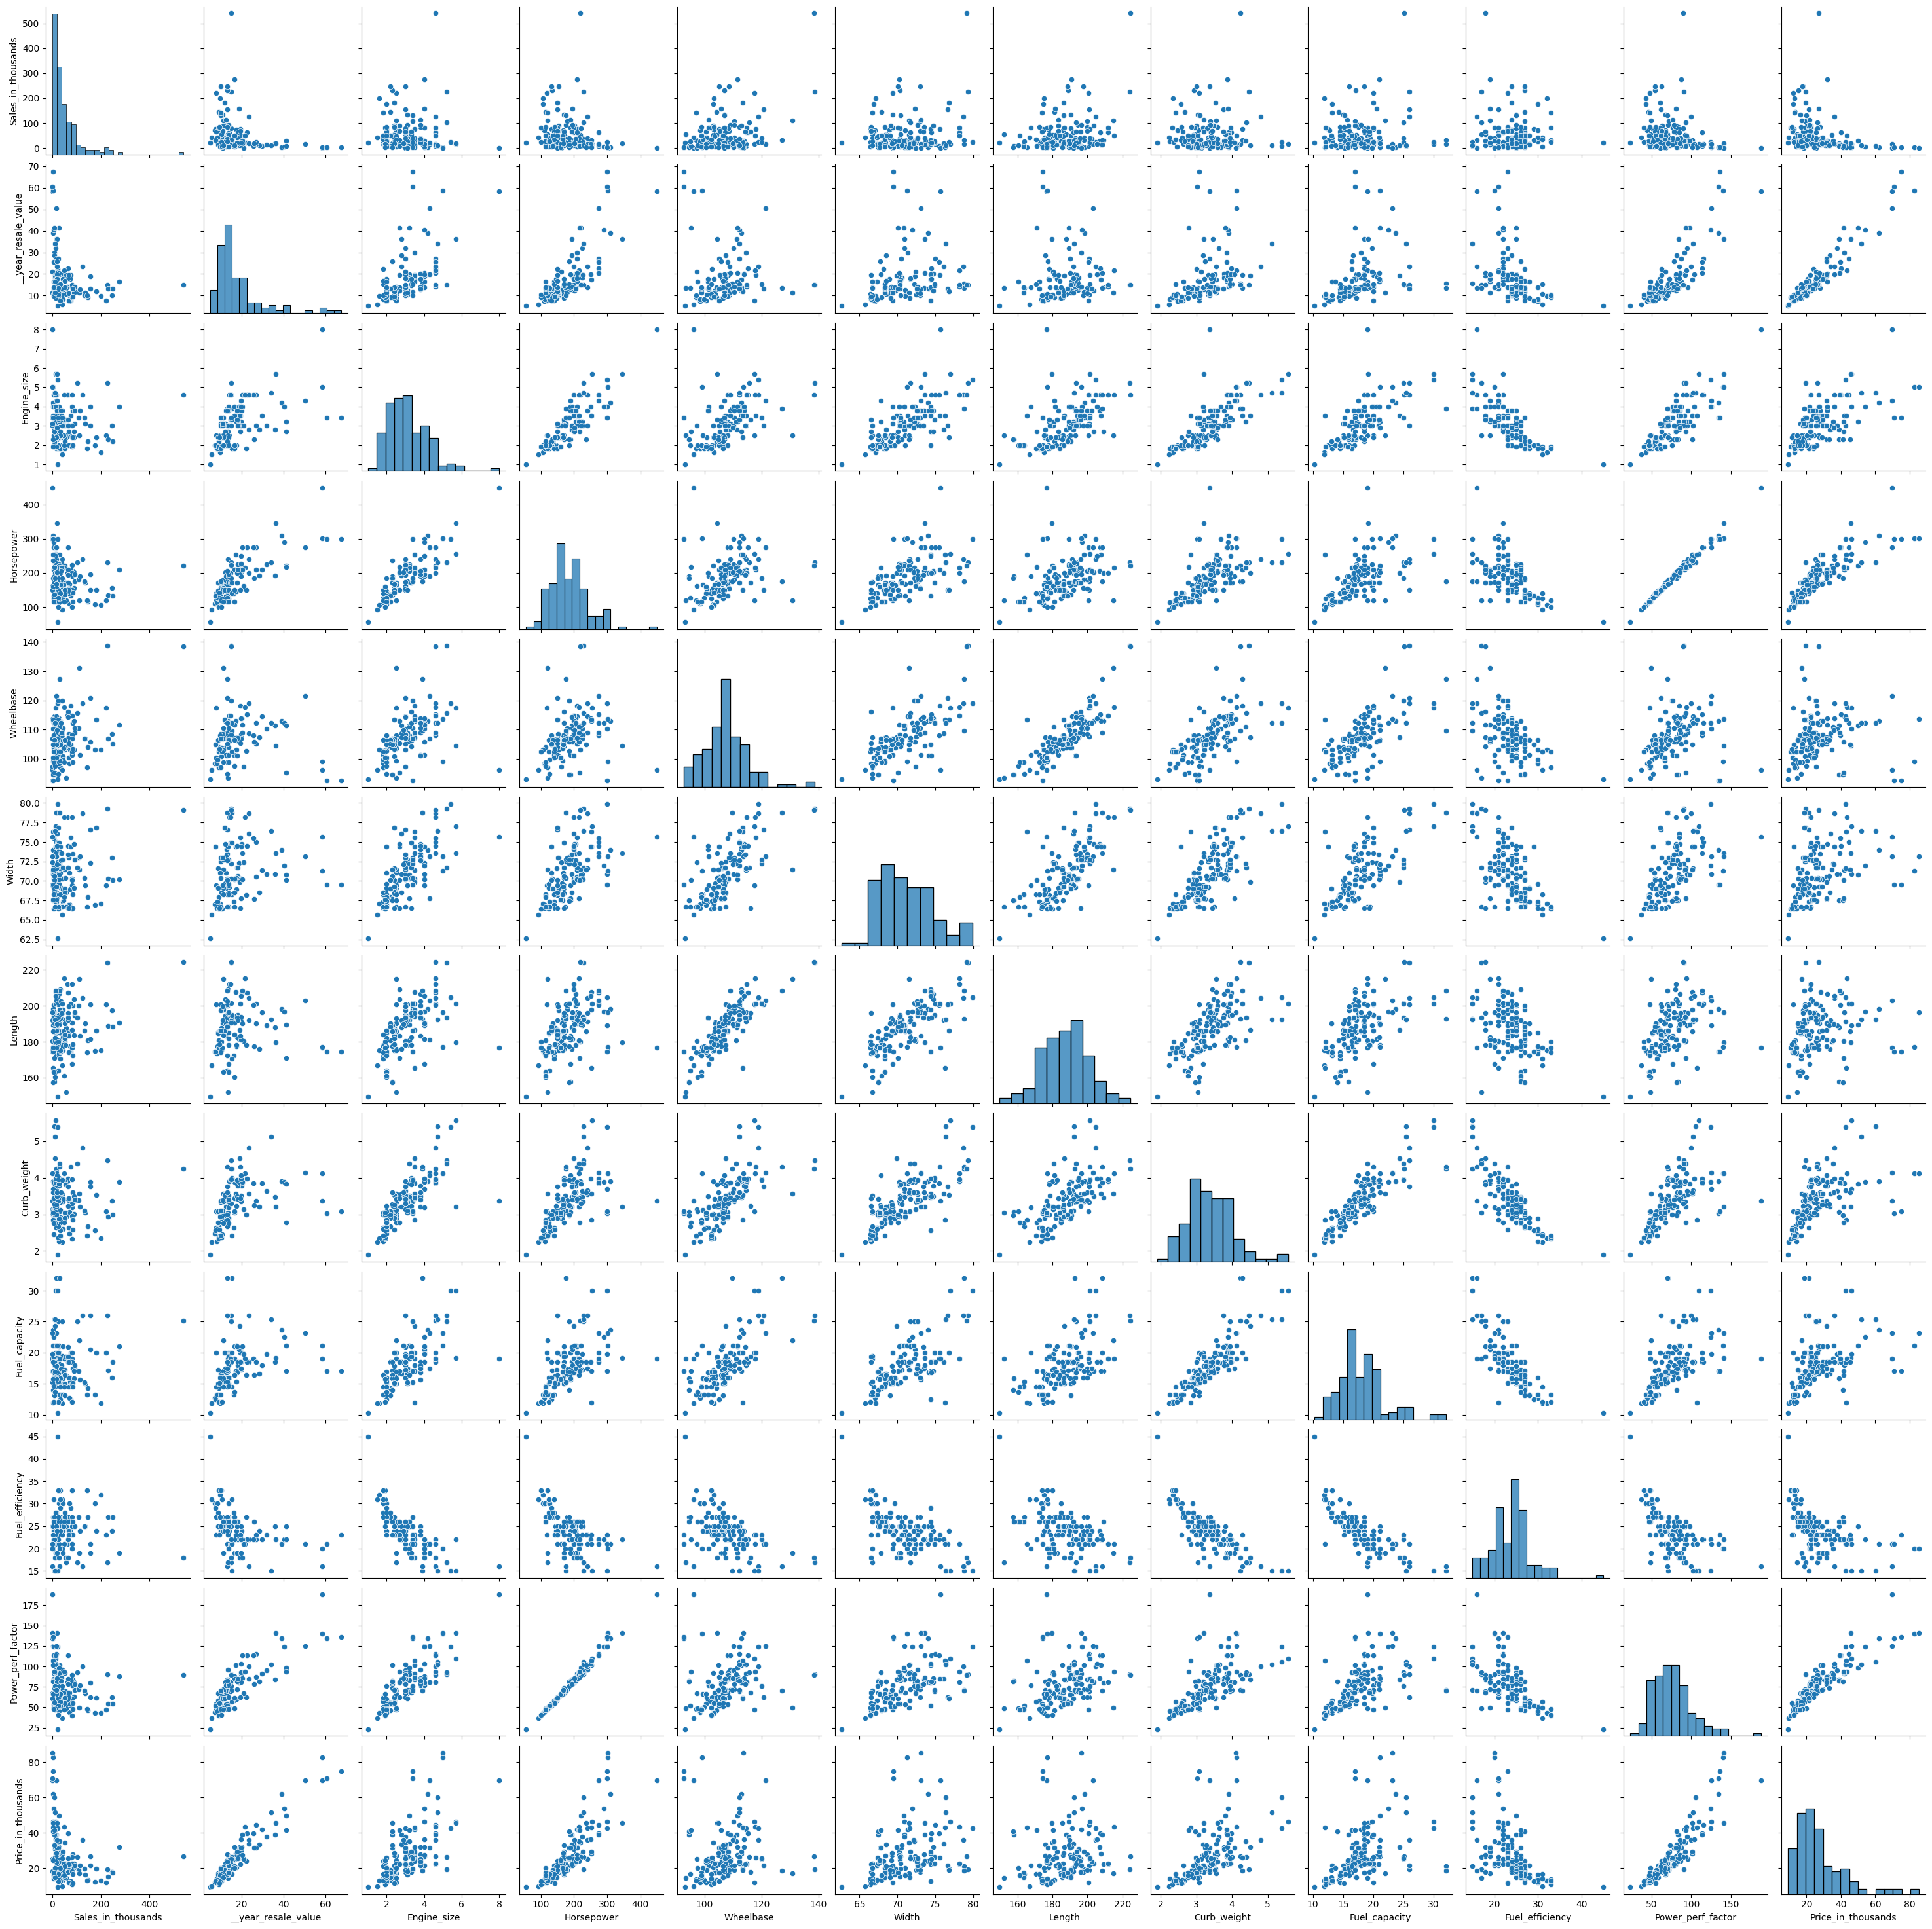

In [5]:
sns.pairplot(df.select_dtypes('number'))

In [6]:
df.select_dtypes('number').describe()

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Price_in_thousands
count,157.000000,121.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,155.000000
mean,52.998076,18.072975,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,27.390755
std,68.029422,11.453384,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,14.351653
min,0.110000,5.160000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.235000
25%,14.114000,11.260000,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,18.017500
50%,29.450000,14.180000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,22.799000
75%,67.956000,19.875000,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,31.947500
max,540.561000,67.550000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,85.500000


### Preprocess data

#### Drop useless columns

In [7]:
df.drop(['Manufacturer','Model','Latest_Launch'],axis=1,inplace=True)

#### Handle missing values

<Axes: >

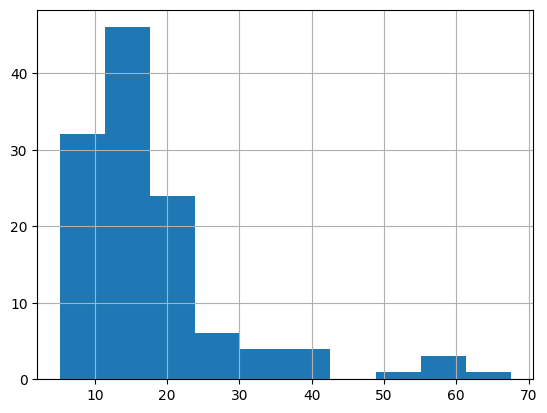

In [8]:
df.__year_resale_value.hist()

In [9]:
# impute with median
df.__year_resale_value = df.__year_resale_value.fillna(df.__year_resale_value.median())

In [10]:
# drop rows with missing price (target)
df = df[~df.Price_in_thousands.isna()]

<Axes: >

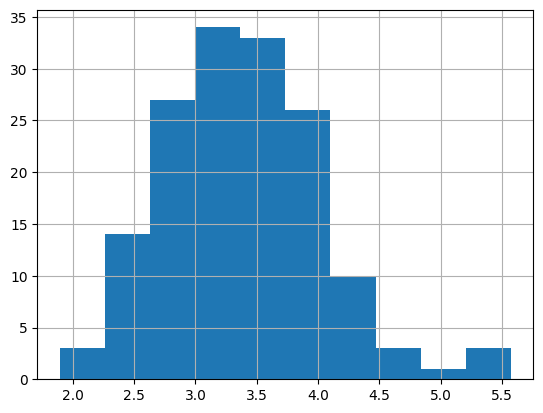

In [11]:
df.Curb_weight.hist()

In [12]:
df.Curb_weight = df.Curb_weight.fillna(df.Curb_weight.median())

<Axes: >

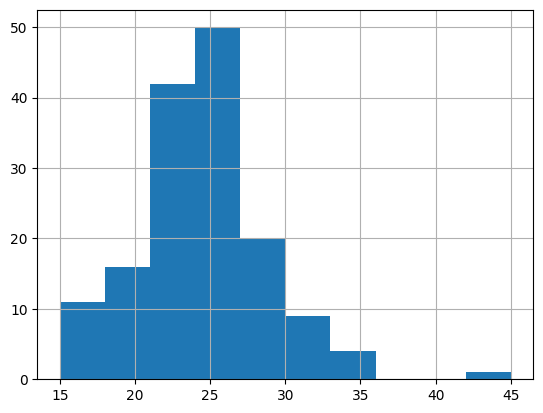

In [13]:
df.Fuel_efficiency.hist()

In [14]:
df.Fuel_efficiency = df.Fuel_efficiency.fillna(df.Fuel_efficiency.median())

#### Drop outliers

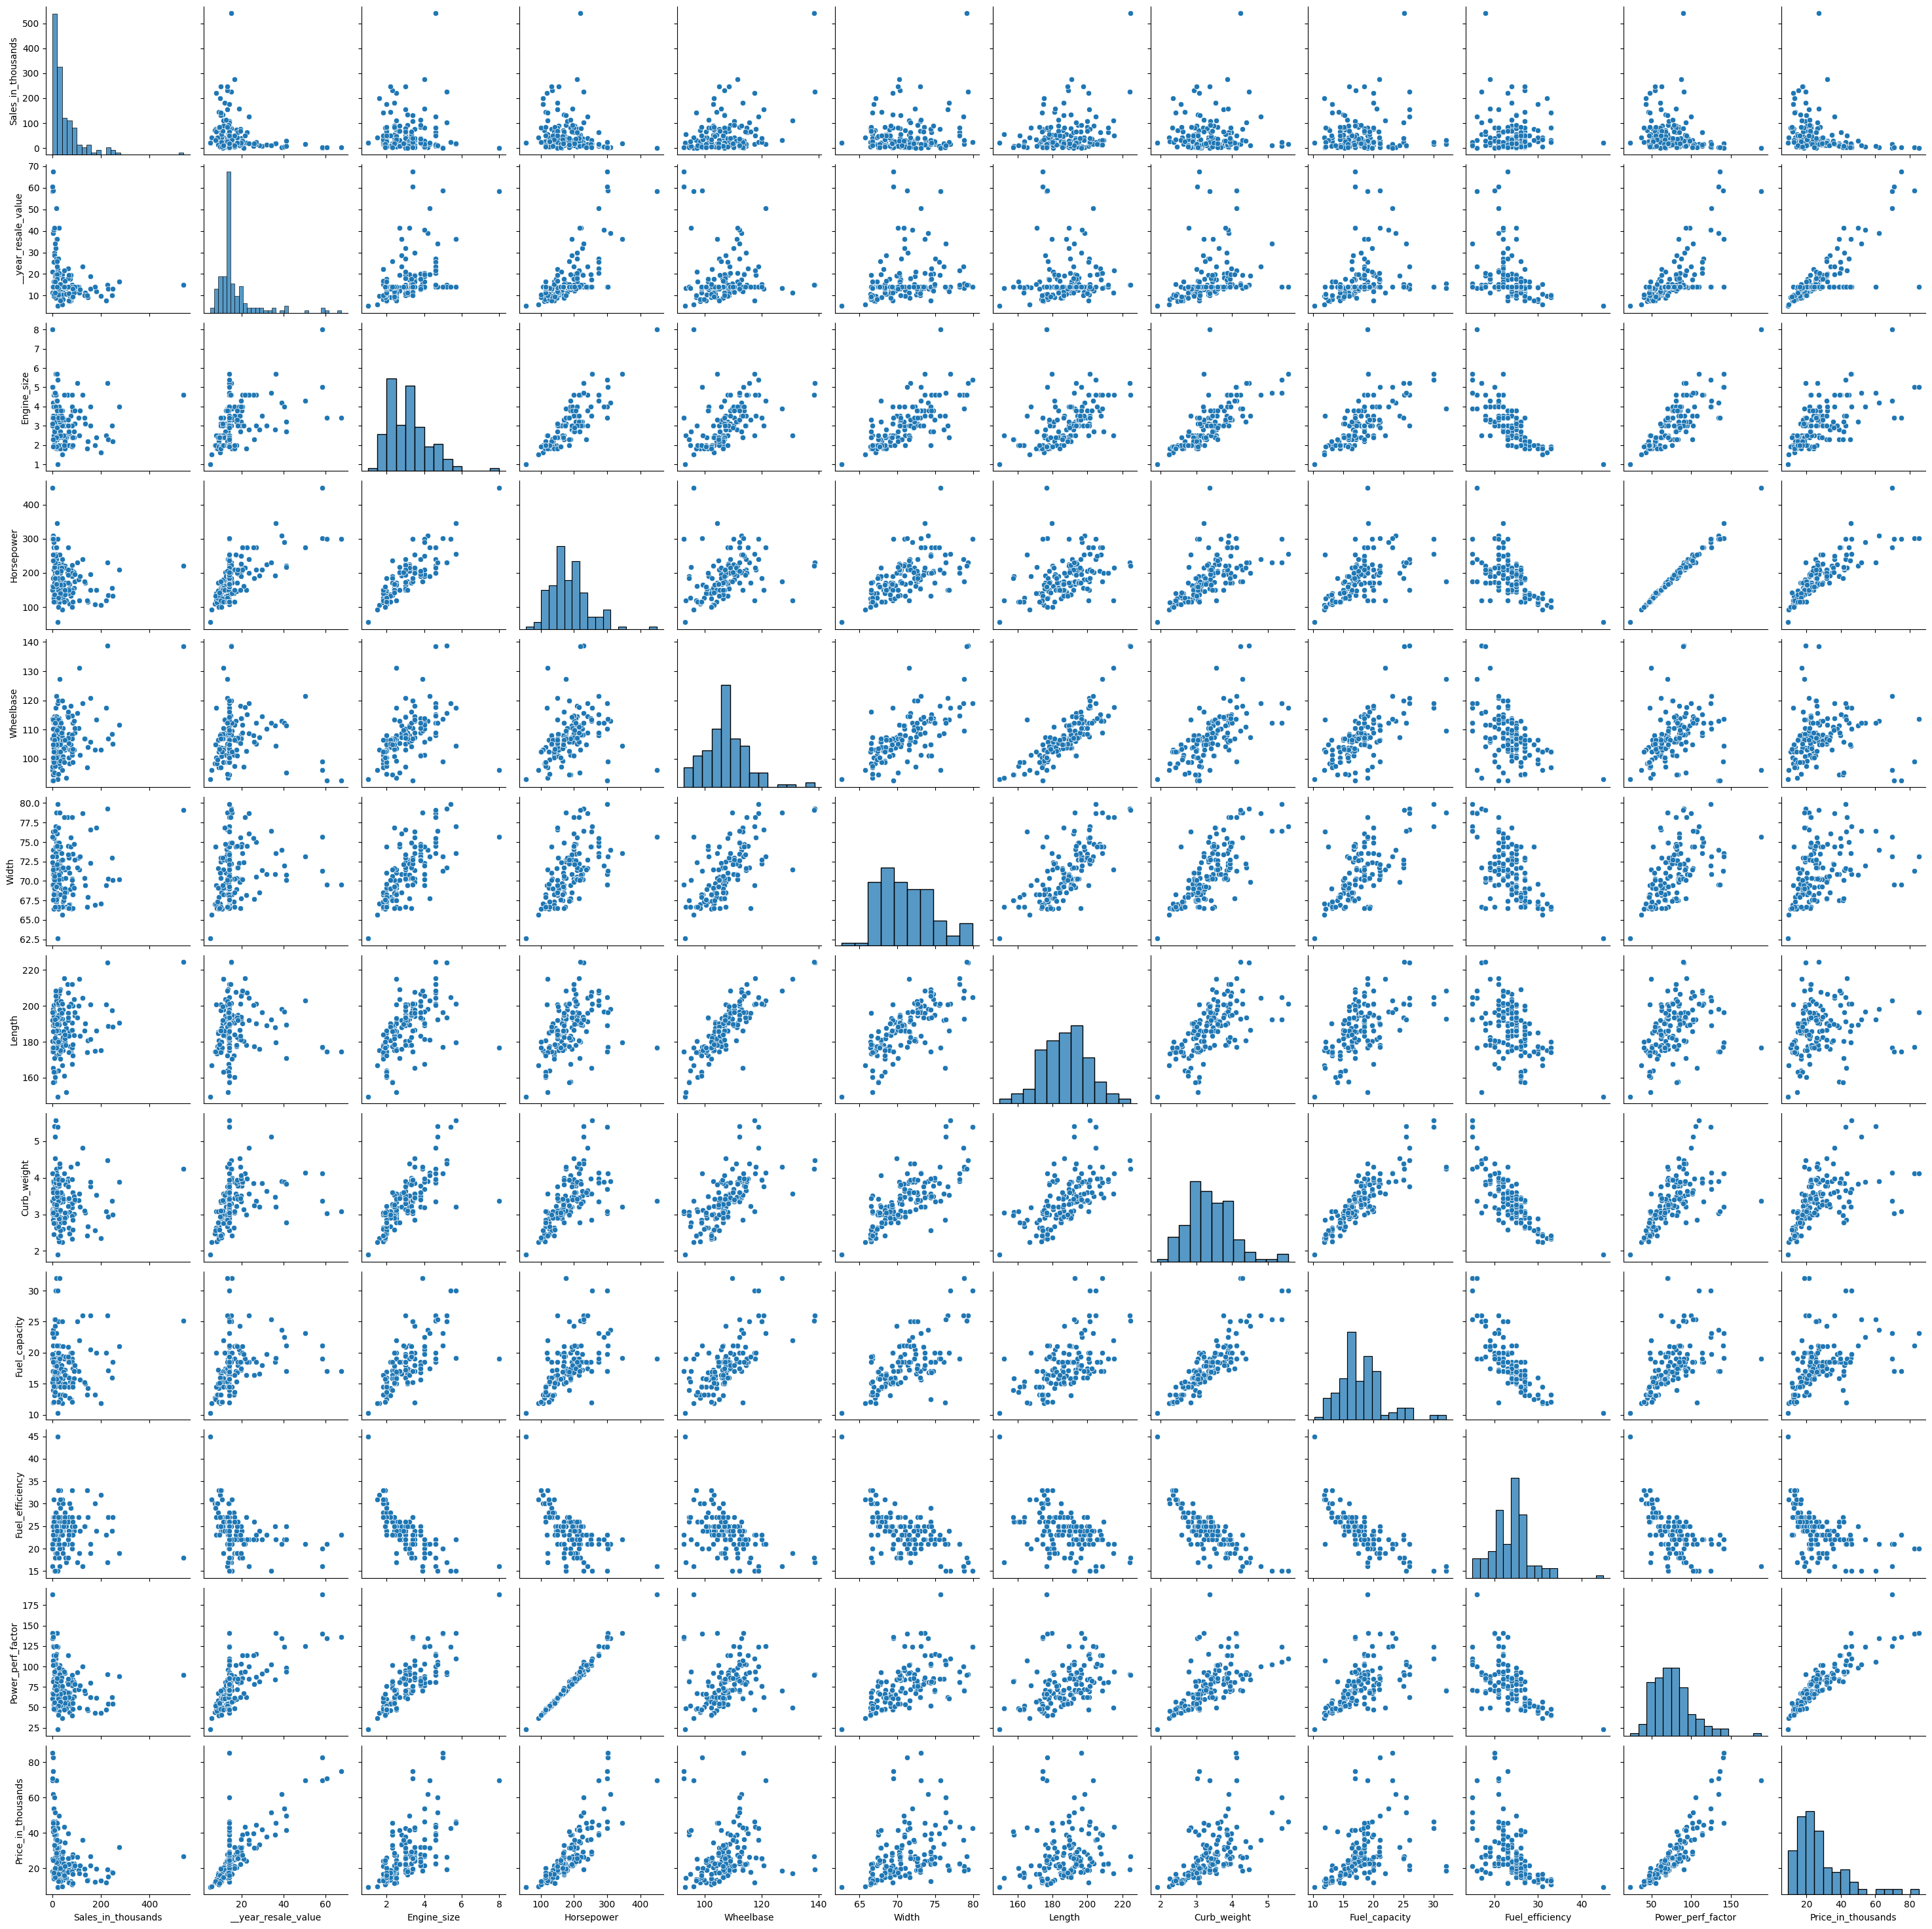

In [15]:
sns.pairplot(df.select_dtypes('number'))

<Axes: >

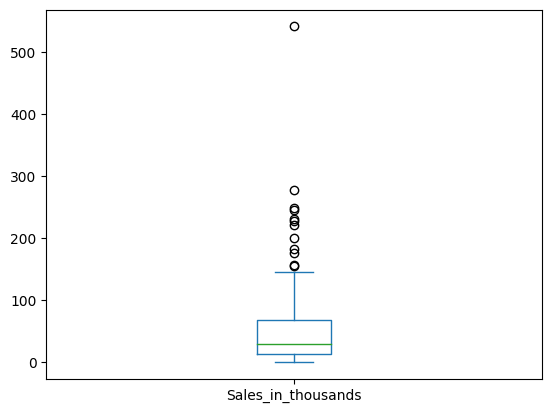

In [16]:
df.Sales_in_thousands.plot(kind='box')

In [17]:
df = df[df.Sales_in_thousands < 500]

<Axes: >

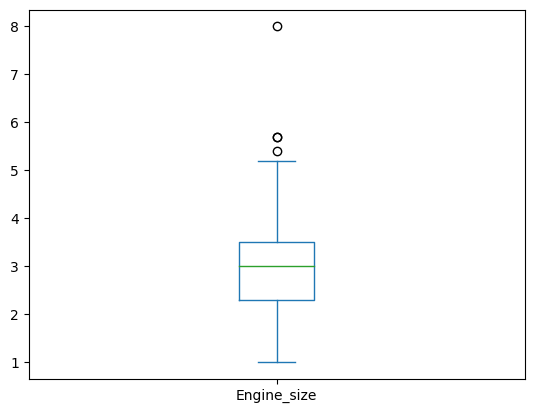

In [18]:
df.Engine_size.plot(kind='box')

In [19]:
df = df[df.Engine_size < 7]

<Axes: >

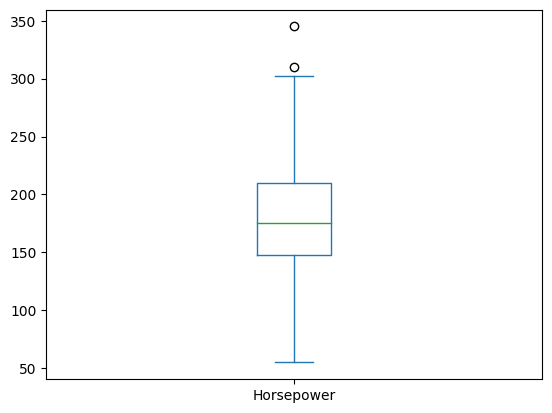

In [20]:
df.Horsepower.plot(kind='box')

In [21]:
df = df[df.Horsepower < 300]

<Axes: >

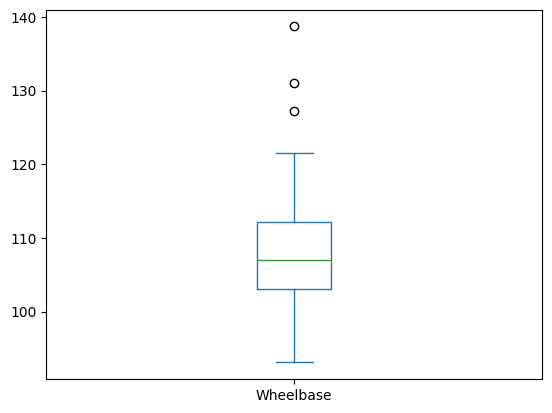

In [22]:
df.Wheelbase.plot(kind='box')

In [23]:
df = df[df.Wheelbase <123]

<Axes: >

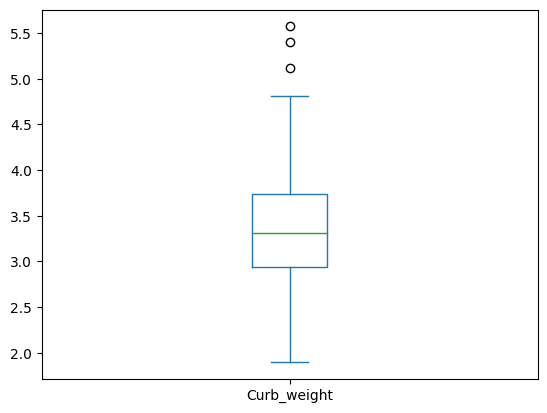

In [24]:
df.Curb_weight.plot(kind='box')

In [25]:
df = df[df.Curb_weight < 5]

<Axes: >

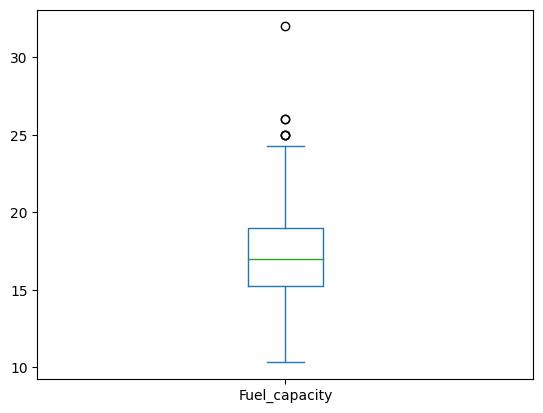

In [26]:
df.Fuel_capacity.plot(kind='box')

In [27]:
df = df[df.Fuel_capacity < 25]

<Axes: >

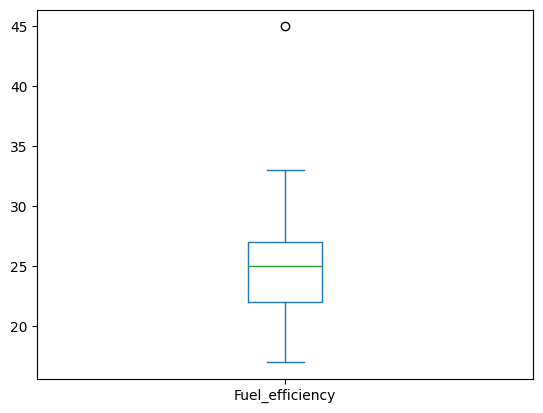

In [28]:
df.Fuel_efficiency.plot(kind='box')

In [29]:
df = df[df.Fuel_efficiency < 40]

#### Convert categorical columns

In [30]:
# convert categorical columns to 0 and 1:
df['Vehicle_type'] = df['Vehicle_type'].replace({'Passenger': 1, 'Car': 0})

#### Test for correlation/multicollinearity

<Axes: >

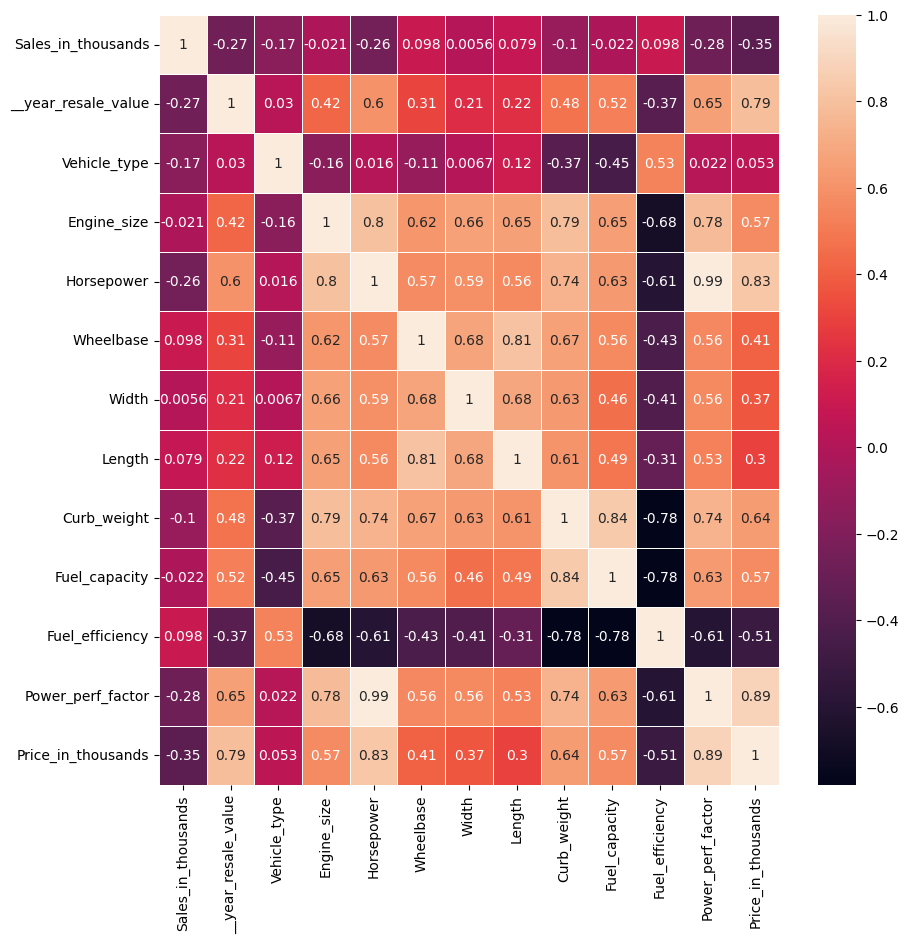

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.select_dtypes('number').corr(),annot=True, linewidths=.5, ax=ax)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = df.drop('Price_in_thousands',axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.drop('Price_in_thousands',axis=1).values, i) for i in range(df.drop('Price_in_thousands',axis=1).shape[1])]

print(vif_data.sort_values('VIF',ascending=False))

               Variable          VIF
11    Power_perf_factor  3102.617604
4            Horsepower  3083.166520
5             Wheelbase  1483.112715
7                Length  1440.812794
6                 Width   935.407747
8           Curb_weight   362.086495
9         Fuel_capacity   214.125440
10      Fuel_efficiency   184.293828
3           Engine_size    69.535056
1   __year_resale_value    18.455471
2          Vehicle_type    15.190665
0    Sales_in_thousands     2.510549


## Train Model

In [33]:
X = df.drop(['Price_in_thousands','Power_perf_factor','Horsepower','Wheelbase'],axis=1) ##
y = df.Price_in_thousands

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [34]:
model = Ridge(random_state = 32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

print('RMSE:',round(mean_squared_error(y_test, preds),2))
print('R Squared:',round(r2_score(y_test, preds),2))

NameError: name 'Ridge' is not defined

## Optimize model

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

ridge = Ridge(random_state = 32)
grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# Retrain
model = Ridge(alpha= 0.1,solver = 'lsqr',random_state = 32)
model.fit(X_train,y_train)

preds = model.predict(X_test)

print('RMSE:',round(mean_squared_error(y_test, preds),2))
print('R Squared:',round(r2_score(y_test, preds),2))

### Feature Selection

In [ ]:
corr_matrix = X_train.corr().abs()  # Compute absolute correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Keep upper triangle

# Find columns with correlation above the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
to_drop

In [ ]:
feats = list(X_train.columns)
best_cols = [x for x in feats if x not in to_drop]
print(best_cols)

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

ridge = Ridge(random_state = 32)
grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train[best_cols], y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
model = Ridge(alpha=0.1,solver='auto',random_state = 32)
model.fit(X_train[best_cols],y_train)

preds = model.predict(X_test[best_cols])

print('RMSE:',round(mean_squared_error(y_test, preds),2))
print('R Squared:',round(r2_score(y_test, preds),2))